In [1]:
import pandas as pd        #importing pandas library to do analysis of data
import numpy as np         # imported numpy to do numerical analysis of data
import matplotlib.pyplot as plt     #For plotting visualizations I imorted matplotlib library
import seaborn as sns               # this library is imported for plotting advanced plots

In [2]:
from docx import Document       # This library is for loading document


doc = Document('all_sentiment_shuffled.docx')      # This is for loading the word document into doc variable

# list is declared to read all the lines and for storing purpose
text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)

# Converting text to pandas DataFrame
df = pd.DataFrame(text, columns=['Text'])

In [3]:
df      #This is for displaying dataset

,Text
0,music neg 241.txt i bought this album because ...
1,music neg 544.txt i was misled and thought i w...
2,books neg 729.txt i have introduced many of my...
3,books pos 278.txt anything you purchase in the...
4,"dvd pos 840.txt i loved these movies , and i c..."
...,...
11909,dvd neg 53.txt the story here dose n't matter ...
11910,software pos 70.txt i liked everything about t...
11911,camera pos 864.txt this flash is the perfect b...
11912,health neg 264.txt i had boughten this as a gi...


In [4]:
df.shape    #This is for knowing the shape of the dataset

(11914, 1)

In [5]:
df.describe()  # This is for descriptive analysis of the data

,Text
count,11914
unique,11914
top,music neg 241.txt i bought this album because ...
freq,1


In [6]:
df.columns   #displaying columns of the data

Index(['Text'], dtype='object')

In [7]:
df['Text']        #Displaying the text column

0        music neg 241.txt i bought this album because ...
1        music neg 544.txt i was misled and thought i w...
2        books neg 729.txt i have introduced many of my...
3        books pos 278.txt anything you purchase in the...
4        dvd pos 840.txt i loved these movies , and i c...
                               ...                        
11909    dvd neg 53.txt the story here dose n't matter ...
11910    software pos 70.txt i liked everything about t...
11911    camera pos 864.txt this flash is the perfect b...
11912    health neg 264.txt i had boughten this as a gi...
11913    health neg 83.txt the pedometer arrive held pr...
Name: Text, Length: 11914, dtype: object

In [8]:
df.head()   #head method is used to display the top 5 rows

,Text
0,music neg 241.txt i bought this album because ...
1,music neg 544.txt i was misled and thought i w...
2,books neg 729.txt i have introduced many of my...
3,books pos 278.txt anything you purchase in the...
4,"dvd pos 840.txt i loved these movies , and i c..."


In [9]:
df.sample(5)   #This is for displaying random five rows in the dataset

,Text
5741,health pos 794.txt they taste good and stop th...
5105,dvd neg 913.txt how can you rate something tha...
3121,health pos 522.txt this small flosses is great...
8489,health neg 177.txt i bought this straightener ...
11064,books pos 181.txt i was impressed by the value...


In [10]:
df.tail()  # displaying last five rows 

,Text
11909,dvd neg 53.txt the story here dose n't matter ...
11910,software pos 70.txt i liked everything about t...
11911,camera pos 864.txt this flash is the perfect b...
11912,health neg 264.txt i had boughten this as a gi...
11913,health neg 83.txt the pedometer arrive held pr...


In [11]:
l1=[]     #This list is to store the category of the data
l2=[]     # This list is used to store the type of the review either positive or negative
l3=[]     #This list is used to store the document name from which the data is extracetd
for i in range(len(df['Text'])):
    l1.append(df['Text'][i].split()[0])
    l2.append(df['Text'][i].split()[1])
    l3.append(df['Text'][i].split()[2])

In [12]:
print(l2)

['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg'

In [13]:
df['labels']=l2     # converting the list data into dataframe

In [14]:
df

,Text,labels
0,music neg 241.txt i bought this album because ...,neg
1,music neg 544.txt i was misled and thought i w...,neg
2,books neg 729.txt i have introduced many of my...,neg
3,books pos 278.txt anything you purchase in the...,pos
4,"dvd pos 840.txt i loved these movies , and i c...",pos
...,...,...
11909,dvd neg 53.txt the story here dose n't matter ...,neg
11910,software pos 70.txt i liked everything about t...,pos
11911,camera pos 864.txt this flash is the perfect b...,pos
11912,health neg 264.txt i had boughten this as a gi...,neg


In [15]:
import re      #importing python regular expression library
lis=[]         #This list is used to store the data after removal of useless data
for i in range(len(df['Text'])):
    sentence=df['Text'][i]
    pattern = r'\.txt\s+(.*)'      #This is a regular expression to get the description of the review
    match = re.search(pattern, sentence)     # This search method is used to find the patterns that mathc the expression
    if match:
        text_after_txt = match.group(1)
        lis.append(text_after_txt)
    else:
        lis.append("no match")

In [16]:
lis

["i bought this album because i loved the title song . it 's such a great song , how bad can the rest of the album be , right ? well , the rest of the songs are just filler and are n't worth the money i paid for this . it 's either shameless bubblegum or oversentimentalized depressing tripe . kenny chesney is a popular artist and as a result he is in the cookie cutter category of the nashville music scene . he 's gotta pump out the albums so the record company can keep lining their pockets while the suckers out there keep buying this garbage to perpetuate more garbage coming out of that town . i 'll get down off my soapbox now . but country music really needs to get back to it 's roots and stop this pop nonsense . what country music really is and what it is considered to be by mainstream are two different things . ",
 'i was misled and thought i was buying the entire cd and it contains one song ',
 "i have introduced many of my ell , high school students to lois lowery and the depth of

In [17]:
df['description']=lis     #Converting the data in lis to dataframe

In [18]:
df

,Text,labels,description
0,music neg 241.txt i bought this album because ...,neg,i bought this album because i loved the title ...
1,music neg 544.txt i was misled and thought i w...,neg,i was misled and thought i was buying the enti...
2,books neg 729.txt i have introduced many of my...,neg,"i have introduced many of my ell , high school..."
3,books pos 278.txt anything you purchase in the...,pos,anything you purchase in the left behind serie...
4,"dvd pos 840.txt i loved these movies , and i c...",pos,"i loved these movies , and i cant wiat for the..."
...,...,...,...
11909,dvd neg 53.txt the story here dose n't matter ...,neg,the story here dose n't matter . the main char...
11910,software pos 70.txt i liked everything about t...,pos,i liked everything about this product except i...
11911,camera pos 864.txt this flash is the perfect b...,pos,this flash is the perfect back-up for a studio...
11912,health neg 264.txt i had boughten this as a gi...,neg,i had boughten this as a gift which turned out...


In [19]:
from nltk.tokenize import word_tokenize     #importing tokenizer from nltk library to tokenize the words
from nltk.corpus import stopwords           # For removing stop words from document we are importing corpus from nltk library

from nltk.stem import PorterStemmer        # For doing stemming we are importing PorterStemmer from nltk library 


df = pd.DataFrame(df)

# Function to preprocess text
def preprocess_text(text):
    
    text = text.lower()         # Convert text to lowercase
    
    text = re.sub(r'[^\w\s]', '', text)   # Remove punctuation
    
    tokens = word_tokenize(text)         # Tokenize text
   
    stop_words = set(stopwords.words('english'))           # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    stemmer = PorterStemmer()                         # Stemming
    tokens = [stemmer.stem(token) for token in tokens]
    
    text = ' '.join(tokens)                     # Join tokens back into a single string
    return text

# Applying preprocessing to the 'description' column
df['Processed_Text'] = df['description'].apply(preprocess_text)

# Display the DataFrame
print(df['Processed_Text'])

0        bought album love titl song great song bad res...
1               misl thought buy entir cd contain one song
2        introduc mani ell high school student loi lowe...
3        anyth purchas left behind seri excel read book...
4        love movi cant wiat third one funni suitabl ch...
                               ...                        
11909    stori dose nt matter main charact fuse missl m...
11910    like everyth product except littl slow time al...
11911    flash perfect backup studio main flash fill am...
11912    boughten gift turn awe idea way loud forc air ...
11913    pedomet arriv held prison difficulttoopen plas...
Name: Processed_Text, Length: 11914, dtype: object


In [20]:
df

,Text,labels,description,Processed_Text
0,music neg 241.txt i bought this album because ...,neg,i bought this album because i loved the title ...,bought album love titl song great song bad res...
1,music neg 544.txt i was misled and thought i w...,neg,i was misled and thought i was buying the enti...,misl thought buy entir cd contain one song
2,books neg 729.txt i have introduced many of my...,neg,"i have introduced many of my ell , high school...",introduc mani ell high school student loi lowe...
3,books pos 278.txt anything you purchase in the...,pos,anything you purchase in the left behind serie...,anyth purchas left behind seri excel read book...
4,"dvd pos 840.txt i loved these movies , and i c...",pos,"i loved these movies , and i cant wiat for the...",love movi cant wiat third one funni suitabl ch...
...,...,...,...,...
11909,dvd neg 53.txt the story here dose n't matter ...,neg,the story here dose n't matter . the main char...,stori dose nt matter main charact fuse missl m...
11910,software pos 70.txt i liked everything about t...,pos,i liked everything about this product except i...,like everyth product except littl slow time al...
11911,camera pos 864.txt this flash is the perfect b...,pos,this flash is the perfect back-up for a studio...,flash perfect backup studio main flash fill am...
11912,health neg 264.txt i had boughten this as a gi...,neg,i had boughten this as a gift which turned out...,boughten gift turn awe idea way loud forc air ...


In [21]:
df['category']=l1     # list l1 is also added to dataframe column 

In [22]:
df

,Text,labels,description,Processed_Text,category
0,music neg 241.txt i bought this album because ...,neg,i bought this album because i loved the title ...,bought album love titl song great song bad res...,music
1,music neg 544.txt i was misled and thought i w...,neg,i was misled and thought i was buying the enti...,misl thought buy entir cd contain one song,music
2,books neg 729.txt i have introduced many of my...,neg,"i have introduced many of my ell , high school...",introduc mani ell high school student loi lowe...,books
3,books pos 278.txt anything you purchase in the...,pos,anything you purchase in the left behind serie...,anyth purchas left behind seri excel read book...,books
4,"dvd pos 840.txt i loved these movies , and i c...",pos,"i loved these movies , and i cant wiat for the...",love movi cant wiat third one funni suitabl ch...,dvd
...,...,...,...,...,...
11909,dvd neg 53.txt the story here dose n't matter ...,neg,the story here dose n't matter . the main char...,stori dose nt matter main charact fuse missl m...,dvd
11910,software pos 70.txt i liked everything about t...,pos,i liked everything about this product except i...,like everyth product except littl slow time al...,software
11911,camera pos 864.txt this flash is the perfect b...,pos,this flash is the perfect back-up for a studio...,flash perfect backup studio main flash fill am...,camera
11912,health neg 264.txt i had boughten this as a gi...,neg,i had boughten this as a gift which turned out...,boughten gift turn awe idea way loud forc air ...,health


In [23]:
df['category'].value_counts()    #This shows how many articles are related to which category

music       2000
books       2000
dvd         2000
health      2000
camera      1999
software    1915
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

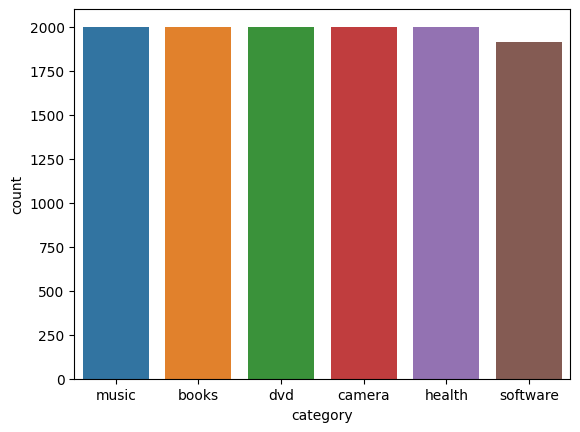

In [24]:
sns.countplot(x=df['category'],data=df)       #countplot is used to show this graphically

In [25]:
#Removing the columns that are not important
df.drop(['Text','description','category'],axis=1,inplace=True)

In [26]:
df

,labels,Processed_Text
0,neg,bought album love titl song great song bad res...
1,neg,misl thought buy entir cd contain one song
2,neg,introduc mani ell high school student loi lowe...
3,pos,anyth purchas left behind seri excel read book...
4,pos,love movi cant wiat third one funni suitabl ch...
...,...,...
11909,neg,stori dose nt matter main charact fuse missl m...
11910,pos,like everyth product except littl slow time al...
11911,pos,flash perfect backup studio main flash fill am...
11912,neg,boughten gift turn awe idea way loud forc air ...


In [27]:
df['Processed_Text']

0        bought album love titl song great song bad res...
1               misl thought buy entir cd contain one song
2        introduc mani ell high school student loi lowe...
3        anyth purchas left behind seri excel read book...
4        love movi cant wiat third one funni suitabl ch...
                               ...                        
11909    stori dose nt matter main charact fuse missl m...
11910    like everyth product except littl slow time al...
11911    flash perfect backup studio main flash fill am...
11912    boughten gift turn awe idea way loud forc air ...
11913    pedomet arriv held prison difficulttoopen plas...
Name: Processed_Text, Length: 11914, dtype: object

In [28]:
df      #pure dataset after deleting unwanted columns

,labels,Processed_Text
0,neg,bought album love titl song great song bad res...
1,neg,misl thought buy entir cd contain one song
2,neg,introduc mani ell high school student loi lowe...
3,pos,anyth purchas left behind seri excel read book...
4,pos,love movi cant wiat third one funni suitabl ch...
...,...,...
11909,neg,stori dose nt matter main charact fuse missl m...
11910,pos,like everyth product except littl slow time al...
11911,pos,flash perfect backup studio main flash fill am...
11912,neg,boughten gift turn awe idea way loud forc air ...


In [29]:
df['labels'].value_counts()       # This is for counting labels. how many are belonging to positive nad how many are negative

pos    6000
neg    5914
Name: labels, dtype: int64

<Axes: xlabel='labels', ylabel='count'>

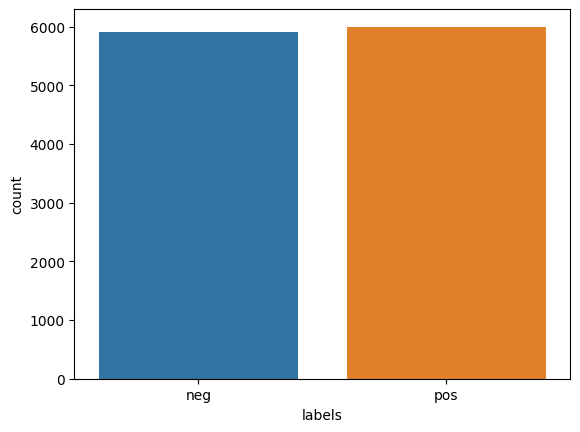

In [30]:
sns.countplot(data=df,x='labels')     # countplot from seaborn library is used to show this graphically

In [31]:
df['labels']=df['labels'].map({'neg':0,'pos':1})  # As the final machine fed data is to be in numbers. So i converted labels
                                                  # data into 0 and 1.

In [32]:
X=df['Processed_Text']    # reading the processed text into X variable
y=df['labels']            # reading the labels data into y variable

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) 
# The data is divided into training data(80%) and testing data(20%) and random sample is set to be at 30

In [34]:
y_test.shape

(2383,)

In [35]:
y_train.shape

(9531,)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer   

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)  #This is for converting text data into vectors
X_train_vect = vectorizer.fit_transform(X_train)   #Transforming the X_train into vectorized format
X_test_vect = vectorizer.transform(X_test)         #Transforming X_test into vectorized format


In [37]:
from sklearn.naive_bayes import MultinomialNB   #multinomial naive bayes algorithm is imported from sklearn library
 
bayesmodel = MultinomialNB()             #loading Multinomial naive bayes model into bayes model variable
bayesmodel.fit(X_train_vect, y_train)    # fit method is used to train the model

MultinomialNB()

In [38]:
# Evaluate classifier
from sklearn.metrics import classification_report

y_pred = bayesmodel.predict(X_test_vect)      #predict method is used to compute the unseen data

print(classification_report(y_test, y_pred))   #classification report

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1188
           1       0.81      0.82      0.82      1195

    accuracy                           0.82      2383
   macro avg       0.82      0.82      0.82      2383
weighted avg       0.82      0.82      0.82      2383



In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8170373478808225
Precision: 0.8138957816377171
Recall: 0.8234309623430962
F1-score: 0.8186356073211315


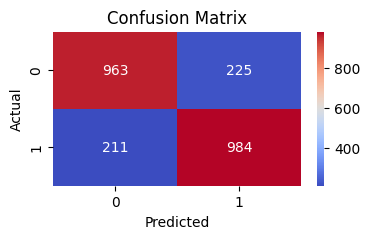

In [40]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')

# Setting axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [42]:
X=vectorizer.fit_transform(X)    #transforming X column into vector format

## K fold cross validation

In [43]:
from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation with k=5
k = 5
cross_val_scores = cross_val_score(bayesmodel, X, y, cv=k, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate and print average accuracy
avg_accuracy = cross_val_scores.mean()
print("Average accuracy:", avg_accuracy)

Cross-validation scores: [0.81200168 0.81829627 0.81535879 0.80864457 0.81444165]
Average accuracy: 0.813748589311429
